In [1]:
import glob
import math
import sys
import timeit

sys.path.insert(0, '../../')
from visualize_dataset import *
from losses import *
from metrics import *
from predict import *
from train import *
from utils import *

Using TensorFlow backend.


In [2]:
path_train_images = '../../../data/stanford_adc_cropped/train/Slice/'
path_train_annotations = '../../../data/stanford_adc_cropped/train/ROI/'
path_train_predictions = './predictions.50e/train/'

path_val_images = '../../../data/stanford_adc_cropped/val/Slice/'
path_val_annotations = '../../../data/stanford_adc_cropped/val/ROI/'
path_val_predictions = './predictions.50e/val/'

path_test_images = '../../../data/stanford_adc_cropped/test/Slice/'
path_test_annotations = '../../../data/stanford_adc_cropped/test/ROI/'
path_test_predictions = './predictions.50e/test/'

path_save_weights = './weights.50e/'
path_load_weights = None

train_vgg = False
path_vgg_weights = '../../../data/vgg16_weights_th_dim_ordering_th_kernels.h5'

n_classes = 2
input_height = 224
input_width = 224
n_channel_annotations = 1

In [3]:
print('Number train images: ', len(glob.glob(path_train_images + '*.png')))
print('Number val images: ', len(glob.glob(path_val_images + '*.png')))
print('Number test images: ', len(glob.glob(path_test_images + '*.png')))

Number train images:  192
Number val images:  11
Number test images:  12


In [4]:
model_name = 'vgg_bayesian_segnet'
epochs = 50
train_batch_size = 8
val_batch_size = len(glob.glob(path_val_images + '*.png'))

In [5]:
optimizer = 'adadelta'
metrics = ['accuracy', dice, iou]

class_props = calc_class_proportions(path_train_annotations, n_classes, n_channel_annotations)
class_weights = calc_class_weights(path_train_annotations, n_classes, n_channel_annotations)
class_weights_log = calc_class_weights(path_train_annotations, n_classes, n_channel_annotations, scale = 'log')

print(class_props)
print(class_weights)
print(class_weights_log)

loss = weighted_categorical_crossentropy_loss(class_weights_log)

[0.98175173 0.01824827]
[ 1.         53.79972696]
[0.01841682 4.00368521]


Model output shape (None, 50176, 2)
Epoch 0
Epoch 1/1
24/24 [==============================] - 855s 36s/step - loss: 0.0368 - acc: 0.6443 - dice: 0.0861 - iou: 0.0452 - val_loss: 0.0441 - val_acc: 0.5694 - val_dice: 0.0380 - val_iou: 0.0194
Epoch 1
Epoch 1/1
24/24 [==============================] - 841s 35s/step - loss: 0.0196 - acc: 0.7188 - dice: 0.1148 - iou: 0.0610 - val_loss: 0.0396 - val_acc: 0.6473 - val_dice: 0.0427 - val_iou: 0.0218
Epoch 2
Epoch 1/1
24/24 [==============================] - 847s 35s/step - loss: 0.0177 - acc: 0.7591 - dice: 0.1314 - iou: 0.0705 - val_loss: 0.0285 - val_acc: 0.7504 - val_dice: 0.0585 - val_iou: 0.0301
Epoch 3
Epoch 1/1
24/24 [==============================] - 847s 35s/step - loss: 0.0161 - acc: 0.7980 - dice: 0.1530 - iou: 0.0831 - val_loss: 0.0291 - val_acc: 0.7974 - val_dice: 0.0666 - val_iou: 0.0345
Epoch 4
Epoch 1/1
24/24 [==============================] - 845s 35s/step - loss: 0.0154 - acc: 0.8257 - dice: 0.1730 - iou: 0.0949 - val_loss: 0

Epoch 40
Epoch 1/1
24/24 [==============================] - 842s 35s/step - loss: 0.0036 - acc: 0.9751 - dice: 0.5915 - iou: 0.4206 - val_loss: 0.0553 - val_acc: 0.9631 - val_dice: 0.1384 - val_iou: 0.0743
Epoch 41
Epoch 1/1
24/24 [==============================] - 838s 35s/step - loss: 0.0036 - acc: 0.9757 - dice: 0.5975 - iou: 0.4272 - val_loss: 0.0582 - val_acc: 0.9661 - val_dice: 0.1399 - val_iou: 0.0752
Epoch 42
Epoch 1/1
24/24 [==============================] - 845s 35s/step - loss: 0.0035 - acc: 0.9752 - dice: 0.5925 - iou: 0.4218 - val_loss: 0.0541 - val_acc: 0.9623 - val_dice: 0.1433 - val_iou: 0.0772
Epoch 43
Epoch 1/1
24/24 [==============================] - 839s 35s/step - loss: 0.0034 - acc: 0.9763 - dice: 0.6036 - iou: 0.4329 - val_loss: 0.0502 - val_acc: 0.9577 - val_dice: 0.1518 - val_iou: 0.0821
Epoch 44
Epoch 1/1
24/24 [==============================] - 844s 35s/step - loss: 0.0032 - acc: 0.9770 - dice: 0.6099 - iou: 0.4397 - val_loss: 0.0559 - val_acc: 0.9684 - val_d

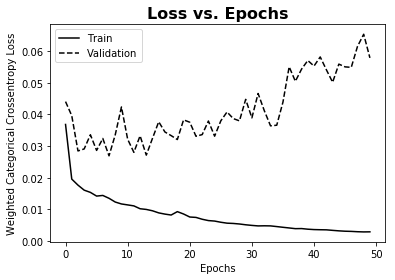

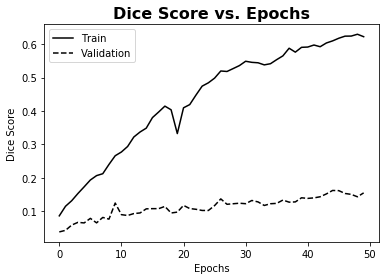

In [6]:
start = timeit.default_timer()
train(
    path_train_images, path_train_annotations, train_batch_size, 
    path_val_images, path_val_annotations, val_batch_size,
    n_classes, input_width, input_height, 
    model_name, epochs, loss, optimizer, metrics,
    path_save_weights, path_vgg_weights = path_vgg_weights, train_vgg = train_vgg, path_load_weights = None
)
end = timeit.default_timer()

In [7]:
print('Total training time: ', end - start)

Total training time:  42218.468286344


In [14]:
epochs = 45

In [15]:
predict(
    path_train_images, path_train_annotations, path_train_predictions,
    n_classes, input_width, input_height, 
    model_name, epochs, loss, optimizer, metrics, 
    path_save_weights
)

              precision    recall  f1-score   support

           0       1.00      0.97      0.98   9457992
           1       0.38      1.00      0.55    175800

   micro avg       0.97      0.97      0.97   9633792
   macro avg       0.69      0.98      0.77   9633792
weighted avg       0.99      0.97      0.98   9633792

F1/dice (binary):  0.5526696388708978
Jaccard/IOU:  0.38185451899160394


In [ ]:
visualize_dataset(
    path_train_images, path_train_annotations, 
    n_classes, n_channel_annotations = n_channel_annotations,
    dir_predictions = path_train_predictions
)

In [17]:
predict(
    path_val_images, path_val_annotations, path_val_predictions,
    n_classes, input_width, input_height, 
    model_name, epochs, loss, optimizer, metrics,
    path_save_weights
)

              precision    recall  f1-score   support

           0       0.99      0.97      0.98    547242
           1       0.10      0.36      0.16      4694

   micro avg       0.97      0.97      0.97    551936
   macro avg       0.55      0.67      0.57    551936
weighted avg       0.99      0.97      0.98    551936

F1/dice (binary):  0.1621232482242273
Jaccard/IOU:  0.08821225257220452


In [ ]:
visualize_dataset(
    path_val_images, path_val_annotations, 
    n_classes, n_channel_annotations = n_channel_annotations,
    dir_predictions = path_val_predictions
)

In [19]:
predict(
    path_test_images, path_test_annotations, path_test_predictions,
    n_classes, input_width, input_height, 
    model_name, epochs, loss, optimizer, metrics,
    path_save_weights
)

              precision    recall  f1-score   support

           0       0.98      0.98      0.98    585528
           1       0.28      0.23      0.25     16584

   micro avg       0.96      0.96      0.96    602112
   macro avg       0.63      0.61      0.62    602112
weighted avg       0.96      0.96      0.96    602112

F1/dice (binary):  0.25185136640671074
Jaccard/IOU:  0.14406747891283975


In [ ]:
visualize_dataset(
    path_test_images, path_test_annotations, 
    n_classes, n_channel_annotations = n_channel_annotations, 
    dir_predictions = path_test_predictions
)